# 1.2 ARMA vs ARIMA Models for Financial Applications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy
plt.style.use('seaborn-v0_8-dark-palette')

## Question 1

<Axes: xlabel='Date', ylabel='Log Close Price'>

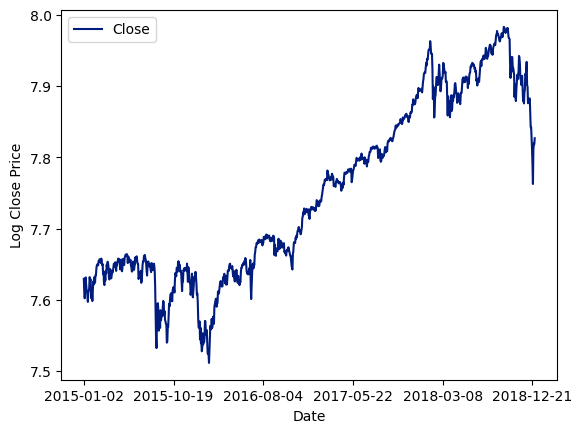

In [3]:
snp = pd.read_csv('../../Data/snp_500_2015_2019.csv')
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
snp_close.index = snp_close.index
snp_close.plot(y='Close', xlabel="Date", ylabel="Log Close Price")

Looking at this we can see a clear trend within the data meaning that an ARMA model would not be effective, on the other hand the use of an ARIMA model could be effective at taking the overall trend in the data out.

## Question 2

/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     7.748867
ar.L1     0.997354
sigma2    0.000074
dtype: float64


/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date', ylabel='Log Close Price'>

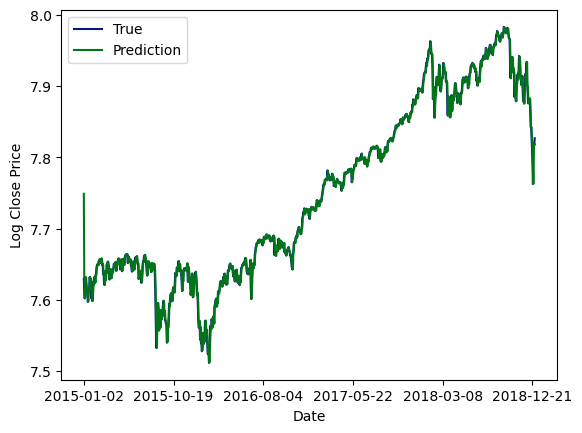

In [4]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,0,0)).fit()
print(model.params)
snp_arma['Res'] = model.resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
snp_arma.plot(y=["True", "Prediction"], xlabel="Date", ylabel="Log Close Price")


Idk what this means --> Inspect the model parameters (model.params). Comment on the results.

These findings are not useful as we have trained the model on the whole of the supplied dataset over fitting it and as such the accuracy is high, but we do not know the real performance without applying it against an unseen dataset.

## Question 3

ar.L1    -0.008170
sigma2    0.000074
dtype: float64


/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date', ylabel='Log Close Price'>

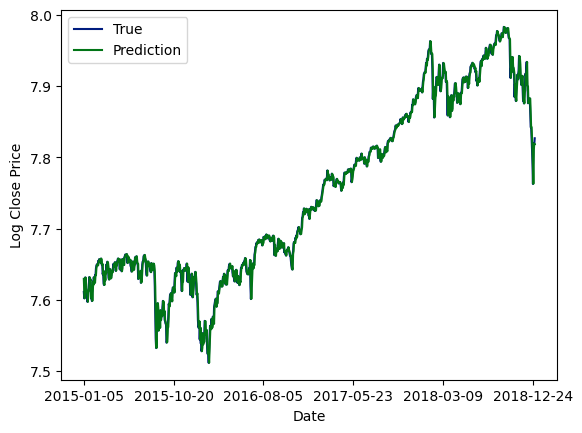

In [5]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
model = ARIMA(snp_arima, order=(1,1,0)).fit()
print(model.params)
snp_arima['Res'] = model.resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']
snp_arima = snp_arima.iloc[1:] #drop first row as the ARIMA pred is delay by 1 and fails on first iter i think
snp_arima.plot(y=["True", "Prediction"], xlabel="Date", ylabel="Log Close Price")


## Question 4

why do we take log prices?